# EDA - Exploratory Data Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from datetime import datetime

## Loading CSV with Pandas plus 1st look into the data

In [35]:
#use pandas to load and convert the CSV
df = pd.read_csv("london-air-quality.csv")


In [36]:
#printing the 1st and last 5 lines of the dataframe
print(df.head(-10))

           date  pm25  pm10   o3  no2  so2  co
0      2023/1/3    48    13   28   18    1   3
1      2023/1/4    36    18   27    9    1   1
2      2023/1/5    37    16   23   16    1   3
3      2023/1/6    30     8   25   19    1   3
4      2023/1/7    13    13   30   12    1   3
...         ...   ...   ...  ...  ...  ...  ..
3273  2014/3/27    68    34   19   48    4   2
3274  2014/3/28    86    54   15   45    4   3
3275  2014/3/29   137    52   31   38    4   3
3276  2014/3/30   113    34   27   49    4   3
3277  2014/3/31    82    45   17   50    6   4

[3278 rows x 7 columns]


We can start by noticing that there 7 columns: 1 for the data, and 6 for variables values. Furthermore, the dataframe seems to be sorted by data, but the final rows seem out of order,



In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3288 non-null   object
 1    pm25   3288 non-null   object
 2    pm10   3288 non-null   object
 3    o3     3288 non-null   object
 4    no2    3288 non-null   object
 5    so2    3288 non-null   object
 6    co     3288 non-null   object
dtypes: object(7)
memory usage: 179.9+ KB
None


We see that all columns are dtype string when they should be: datetime (for the date) and floats or integers for all other variables for us to be able to study and learn from them.

## Dtype Convertion

Above, we saw that all columns are of the dtype object which means they are strings. Before we do anything else we need to convert them all to numbers we can read (floats or integers).

In [38]:
#1st convert data column to datetime object
df["date"] = pd.to_datetime(df["date"], format = "%Y/%m/%d" )

#2nd convert all other columns, that we know should be floats
for col in df.columns[1:]:
    #notice that column variable names come with a whitespace before the actual name, we will remove it
    new_name = col.strip()
    df.rename(columns= {f"{col}": f"{new_name}"}, inplace=True)
    #conver string to numeric values
    df[f"{new_name}"] = pd.to_numeric(df[f"{new_name}"], errors="coerce")

In [39]:
#check if dtypes are correct now
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3288 non-null   datetime64[ns]
 1   pm25    3278 non-null   float64       
 2   pm10    3279 non-null   float64       
 3   o3      3243 non-null   float64       
 4   no2     3246 non-null   float64       
 5   so2     2762 non-null   float64       
 6   co      3149 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 179.9 KB
None


In [40]:
df.describe()

,pm25,pm10,o3,no2,so2,co
count,3278.000000,3279.000000,3243.000000,3246.000000,2762.000000,3149.000000
mean,59.790726,24.659652,24.666050,34.465496,3.677408,4.822483
std,21.620866,9.919508,9.541935,14.698088,2.483671,2.663329
min,13.000000,5.000000,1.000000,3.000000,1.000000,1.000000
25%,46.000000,18.000000,19.000000,23.000000,2.000000,3.000000
50%,57.000000,23.000000,25.000000,34.000000,3.000000,4.000000
75%,69.000000,29.000000,30.000000,45.000000,5.000000,6.000000
max,177.000000,89.000000,91.000000,92.000000,27.000000,19.000000


## Final Check - Sorting, Missing, and Duplicate Rows

In [41]:
#be sure the df is sorted by date
df.sort_values(by=["date"])
#be sure there are no days missing
assert df["date"].isnull().sum() == 0

In [42]:
#delete duplicate rows
print(df.shape)
df.drop_duplicates()
print(df.shape)
#no duplicates if the output shape is the same

(3288, 7)
(3288, 7)


## Data exploration


We are now ready to explore the data: look for patterns, distributions, errors, and quirks in the data.


### Missing Values

<AxesSubplot: >

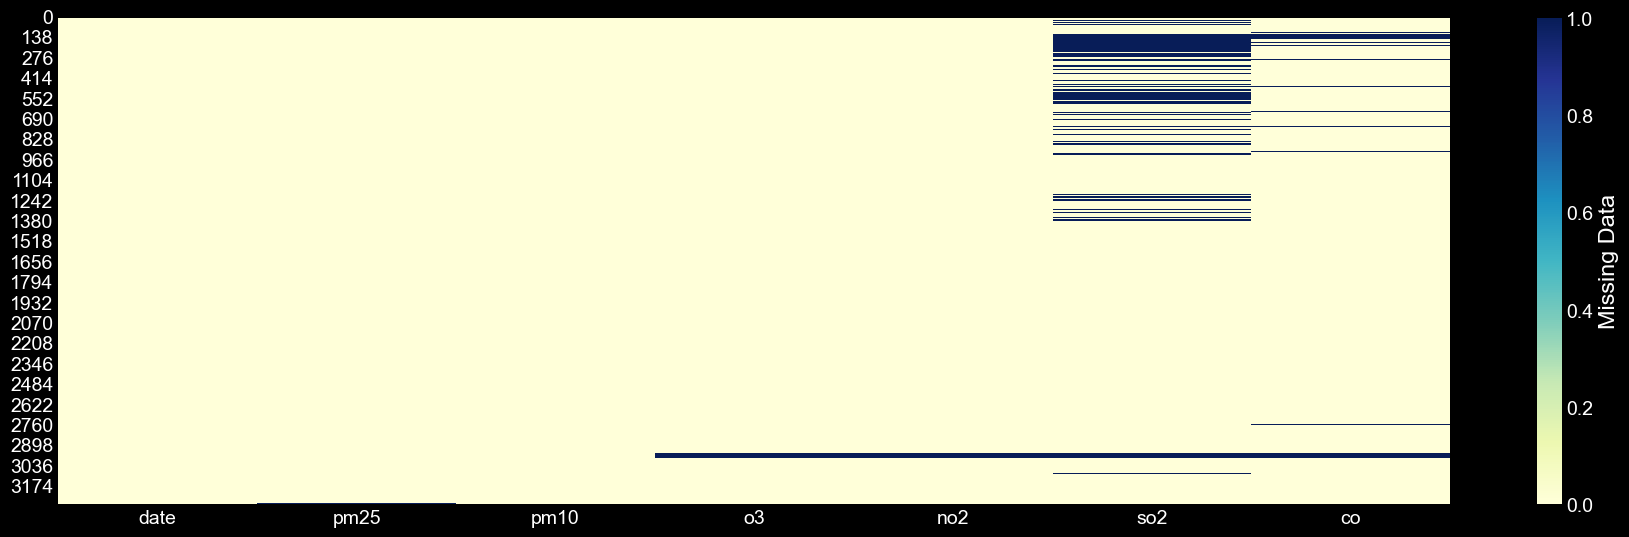

In [43]:
#Checking Missing Values
plt.figure(figsize=(20,6))
sns.heatmap(df.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

The column ***so2*** has many missing values, we will have to be careful with it. There is also some rows (days), when more than one variable is missing, and it seems there is no day missing completely from the data. We will handle missing values when we process the data, for now we are just exploring and *learning* the data.

<Figure size 2000x600 with 0 Axes>

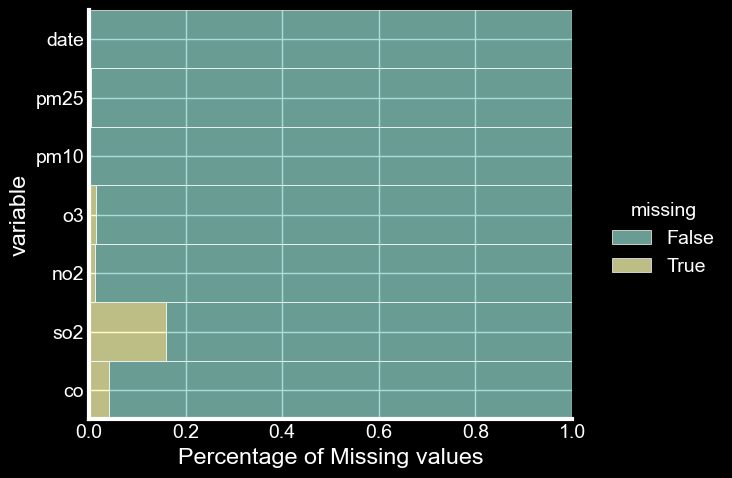

In [44]:
#just one last check to confirm the percentage of missing values for each column
plt.figure(figsize=(20,6))
ax = sns.displot(
data=df.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=1.25
)
ax.set(xlabel="Percentage of Missing values")
plt.show()

The ***so2*** column has about 20% missing data, which is problematic. We will probably not use it and discard it in the data transformation phase. This the 1st example of why EDA is important.

### Checking for non-unique entries count

co       18
so2      21
pm10     67
o3       75
no2      81
pm25    139
dtype: int64


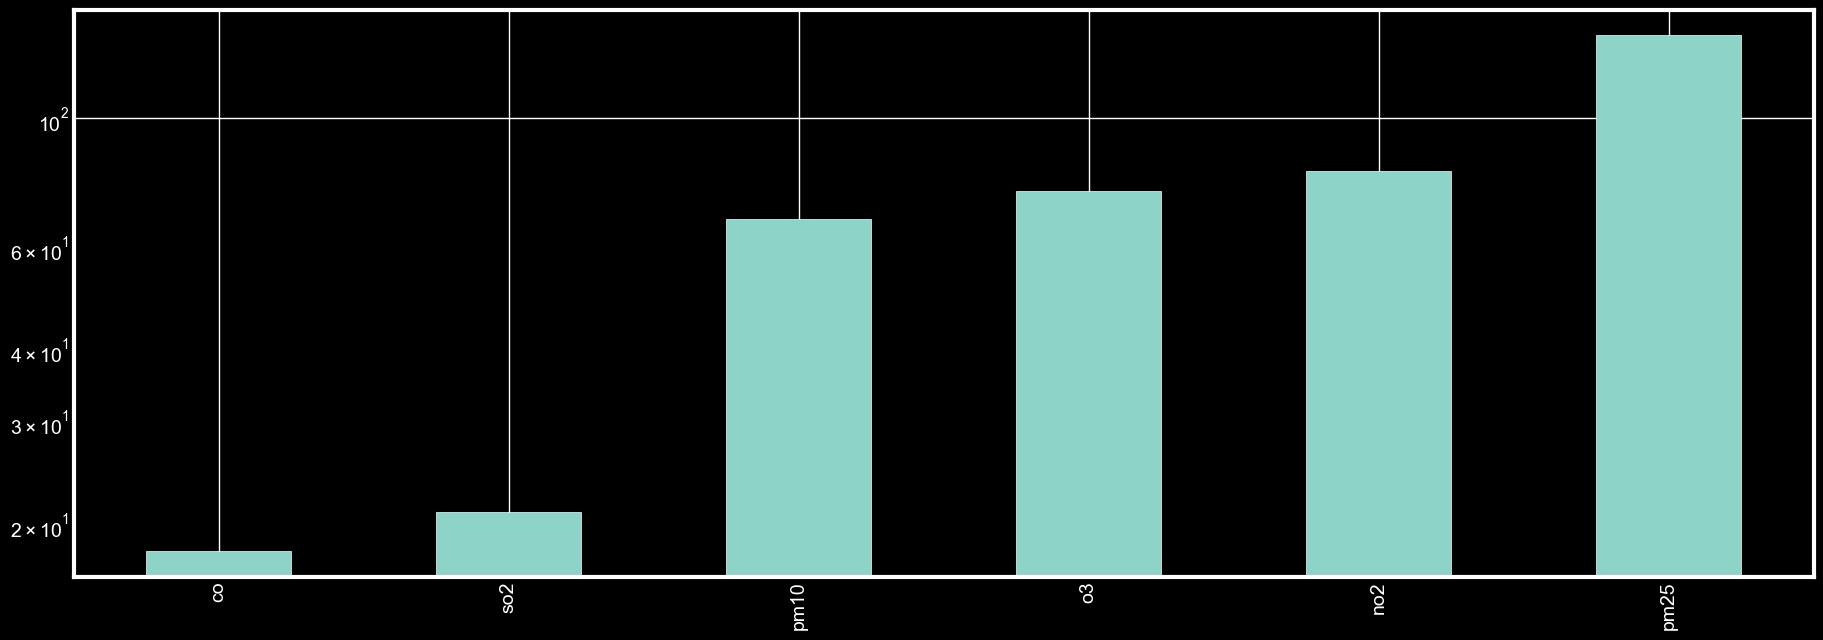

In [45]:
# how many non-unique entries does each column have?
unique_values = df.select_dtypes(include='float64').nunique().sort_values()
print(unique_values)
unique_values.plot(kind="bar",logy=True,figsize=(20,7))
plt.show()

We can see that there are 2 variables (co and so2) with much less non-unique variables than the others. This means that probably the measure of these 2 variables is:
    1. Done with low resolution sensors;
    2. Hard;
    3. Disregarded/ Not important to health factors;

### Variables distributions

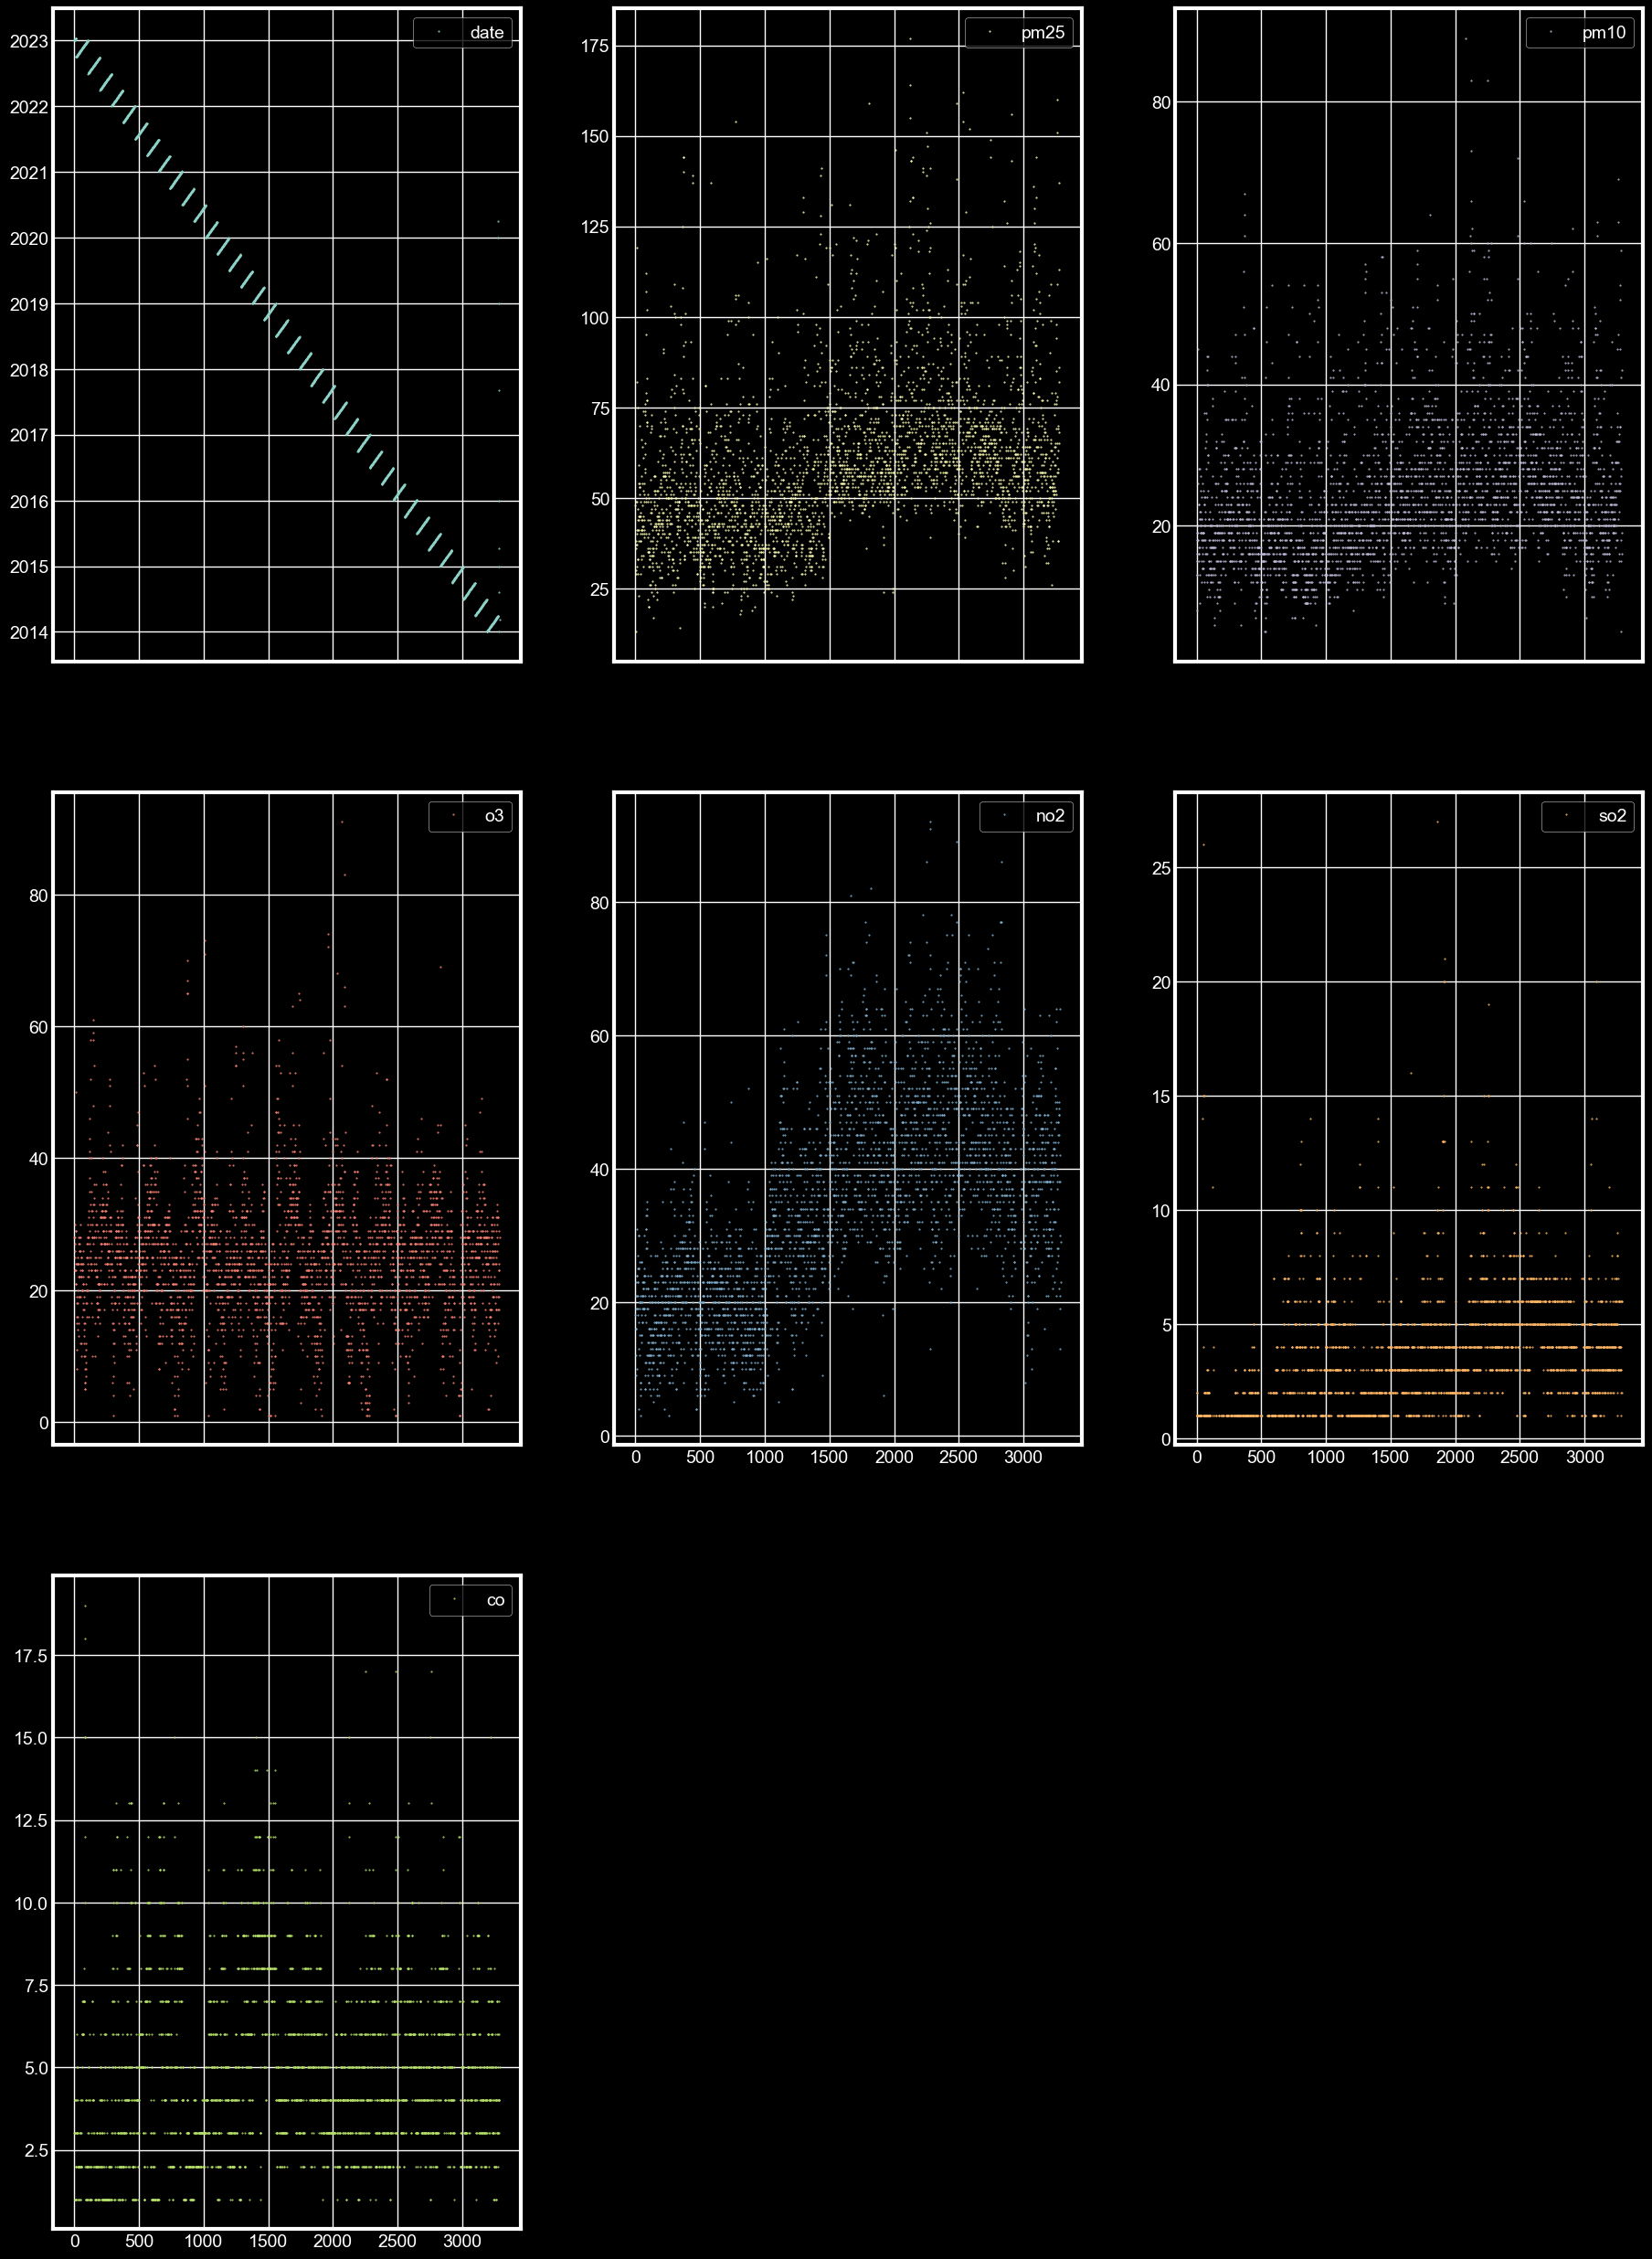

In [46]:

df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(20, 30), markersize=1);
